# ABOUT:
- in all previous notebooks, we had been using simple imputation fo missing values i.e :
    - for numerical columns we imputed the median 
    - and categorical columns we imputed the mode or a new class
- simple imputation may not be the best strategy, thus in this notebook, i:
    - **compare the performances imputation techniques** namely:
        1. Simple imputation 
            - imputing via mean, median, mode (or new category)
        2. IterativeImputer 
            - imputing missing values by modeling each feature with missing values as a function of other features
        3. KNNImputer
            - missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.
        4. MissForest
            - imputer that uses random forest to predict missing values
            
- insights:
    - **manual simple imputing consistently outperformed all other imputers**
    - **the only promising imputer was IterativeImputer** which occasionally better performance than manual imputation
    - future studies can investigate IterativeImputer further 

### import data

In [4]:
train_features = pd.read_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\training_set_features.csv",index_col = "respondent_id")
train_labels = pd.read_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\training_set_labels.csv",index_col = "respondent_id")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# we encode categories with Ordinal encoder
from category_encoders.ordinal import OrdinalEncoder
en = OrdinalEncoder(handle_missing = "return_nan")
X = en.fit_transform(train_features)
y = train_labels.h1n1_vaccine

In [6]:
train_features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


### simple imputed data
- previously we imputed NAs in this dataset with median or mode, or a new class manually


In [7]:
simple_imputed_data = pd.read_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\cleaned_train_set.csv",index_col = "respondent_id")
simpleImputed_X = simple_imputed_data[[col for col in simple_imputed_data.columns if col not in ['h1n1_vaccine', 'seasonal_vaccine']]]

<IPython.core.display.Javascript object>

# IterativeImputer

In [8]:
from sklearn.impute import KNNImputer,IterativeImputer
imputer = IterativeImputer(random_state=0)
IterativeImputed_X = imputer.fit_transform(X)

In [9]:
pd.DataFrame(IterativeImputed_X).head(2)

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,9.32398,10.119864
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,2.00000,2.000000


# KNNImputer

In [10]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
KNNImputed_X = imputer.fit_transform(X)

In [11]:
pd.DataFrame(KNNImputed_X).head(2)

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,9.5,9.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0


# MissForest

In [14]:
import sklearn.neighbors._base                                       # this 2 lines avoids some naming issue
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
imputer = MissForest(n_jobs = -1)
missforest_X = imputer.fit_transform(X)

<IPython.core.display.Javascript object>

Iteration: 0
Iteration: 1
Iteration: 2


In [15]:
pd.DataFrame(missforest_X).head(2)

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,11.39,10.79
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,2.00,2.00


# Imputer Comparison Experiment
- we train mutiple ensemble models on each of the imputed datasets. then, calculate the auc score by cross validation

In [16]:
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier,GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,RandomForestClassifier
param = {"n_estimators":100, 
         "random_state":0}
ensemble_models = {
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier()}
ensemble_models  = {k:(v.set_params(**param) if k!="HistGradientBoostingClassifier" else v) for k,v in ensemble_models.items() }

In [17]:
from collections import defaultdict
score_board = defaultdict(list)

In [18]:
from sklearn.model_selection import cross_val_score
for df_name, temp_X in zip(["SimpleImputer","KNNImputer","IterativeImputer","MissForest"],[simpleImputed_X,KNNImputed_X,IterativeImputed_X,missforest_X]):
    for model_name, model in ensemble_models.items():
        score = cross_val_score(model,temp_X,y,scoring = "roc_auc",cv=3).mean()
        score_board[df_name].append(score)

In [19]:
score_board.update({"model":ensemble_models.keys()})
score_board_df = pd.DataFrame(score_board)
score_board_df  = pd.melt(score_board_df, id_vars = "model",value_vars = ["SimpleImputer","KNNImputer","IterativeImputer","MissForest"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Results
- **Only IterativeImputer yield equal performance compared to simple imputation** (manual imputation by intuition)
- **other imputers worsened the performances** 
- Hypothesis:
    - there were some columns in the dataset which had a very large proportion of NAs
    - Imputers may have had trouble imputing those columns 

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'HistGradientBoostingClassifier'),
  Text(1, 0, 'AdaBoostClassifier'),
  Text(2, 0, 'GradientBoostingClassifier'),
  Text(3, 0, 'BaggingClassifier'),
  Text(4, 0, 'ExtraTreesClassifier'),
  Text(5, 0, 'RandomForestClassifier')])

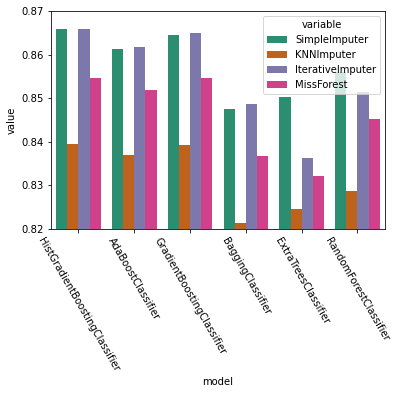

In [32]:
import seaborn as sb
sb.barplot(data  = score_board_df, x = "model",y ="value" ,hue = "variable",palette = "Dark2").set(ylim = (0.82,0.87))
plt.xticks(rotation=300)

In [35]:
score_board_df.sort_values("model")[score_board_df.variable.isin(["SimpleImputer","IterativeImputer"])]

<ipython-input-35-a0aeca47eb07>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  score_board_df.sort_values("model")[score_board_df.variable.isin(["SimpleImputer","IterativeImputer"])]


,model,variable,value
1,AdaBoostClassifier,SimpleImputer,0.861177
13,AdaBoostClassifier,IterativeImputer,0.861635
15,BaggingClassifier,IterativeImputer,0.848604
3,BaggingClassifier,SimpleImputer,0.847405
4,ExtraTreesClassifier,SimpleImputer,0.850354
16,ExtraTreesClassifier,IterativeImputer,0.836189
14,GradientBoostingClassifier,IterativeImputer,0.865004
2,GradientBoostingClassifier,SimpleImputer,0.864516
12,HistGradientBoostingClassifier,IterativeImputer,0.865917
0,HistGradientBoostingClassifier,SimpleImputer,0.865978


# Imputer Comparison Experiment attempt 2
- using KMMImputer or IterativeImputer to impute columns with large proportion of NAs might have caused trouble
- thus, we **only use KMMImputer or IterativeImputer for columns with less than 1000 NAs**

In [37]:
# for columns with more than 2000 NAs we resort to simple imputing
too_many_NAs = [col for col, na_count in train_features.isna().sum().items() if na_count>2000]
train_features[too_many_NAs]  = simpleImputed_X[too_many_NAs]

In [40]:
en = OrdinalEncoder(handle_missing = "return_nan", cols = train_features.columns)
X = en.fit_transform(train_features)

C:\Users\tanch\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


## IterativeImputer

In [46]:
imputer = IterativeImputer(random_state=0)
IterativeImputed_X = imputer.fit_transform(X)

## KNNImputer

In [47]:
imputer = KNNImputer(n_neighbors=5)
KNNImputed_X = imputer.fit_transform(X)

## MissForest

In [48]:
imputer = MissForest(n_jobs = -1)
missforest_X = imputer.fit_transform(X)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


## Modelling

In [49]:
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier,GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,RandomForestClassifier
param = {"n_estimators":100, 
         "random_state":0}
ensemble_models = {
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier()}
ensemble_models  = {k:(v.set_params(**param) if k!="HistGradientBoostingClassifier" else v) for k,v in ensemble_models.items() }

In [50]:
from collections import defaultdict
score_board = defaultdict(list)

In [51]:
from sklearn.model_selection import cross_val_score
for df_name, temp_X in zip(["SimpleImputer","KNNImputer","IterativeImputer","MissForest"],[simpleImputed_X,KNNImputed_X,IterativeImputed_X,missforest_X]):
    for model_name, model in ensemble_models.items():
        score = cross_val_score(model,temp_X,y,scoring = "roc_auc",cv=3).mean()
        score_board[df_name].append(score)

In [52]:
score_board.update({"model":ensemble_models.keys()})
score_board_df = pd.DataFrame(score_board)
score_board_df  = pd.melt(score_board_df, id_vars = "model",value_vars = ["SimpleImputer","KNNImputer","IterativeImputer","MissForest"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Results
- manual simple imputing outperformed all other imputers


<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'HistGradientBoostingClassifier'),
  Text(1, 0, 'AdaBoostClassifier'),
  Text(2, 0, 'GradientBoostingClassifier'),
  Text(3, 0, 'BaggingClassifier'),
  Text(4, 0, 'ExtraTreesClassifier'),
  Text(5, 0, 'RandomForestClassifier')])

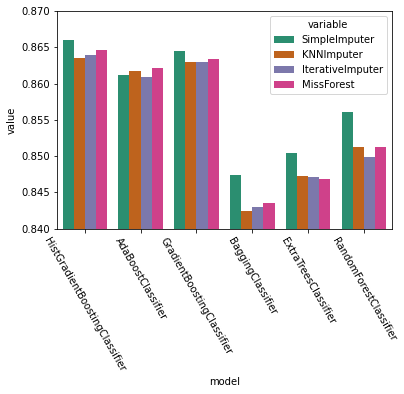

In [53]:
import seaborn as sb
sb.barplot(data  = score_board_df, x = "model",y ="value" ,hue = "variable",palette = "Dark2").set(ylim = (0.84,0.87),xticklabels=ensemble_models.keys())
plt.xticks(rotation=300)

In [54]:
score_board_df.sort_values(["model"])

,model,variable,value
19,AdaBoostClassifier,MissForest,0.862112
1,AdaBoostClassifier,SimpleImputer,0.861177
13,AdaBoostClassifier,IterativeImputer,0.860950
7,AdaBoostClassifier,KNNImputer,0.861704
15,BaggingClassifier,IterativeImputer,0.842937
9,BaggingClassifier,KNNImputer,0.842415
3,BaggingClassifier,SimpleImputer,0.847405
21,BaggingClassifier,MissForest,0.843543
4,ExtraTreesClassifier,SimpleImputer,0.850354
10,ExtraTreesClassifier,KNNImputer,0.847311
